In [3]:
!pip install rdkit-pypi
import numpy as np
import pandas as pdp
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole

Работа с молекулой кофеина

Для записи координат структурной формулы используется формат SDF(3D),SMILES(2D)

(SDF)-3D В нём координаты атомов, после связи атомов, после все свойства, которые запишешь

SMILES - 2D Двумерное представление, записываем формулу в одну строку, разрывая связи(на месте разрыва ставим индексы), ответвления пихаем в скобки, обычные водороды опускаем(в CH3 >>> C)

In [4]:
mol = Chem.MolFromMolFile("caffeine.sdf")
mol #из-за консоли IPythonConsole отображается

OSError: Bad input file caffeine.sdf

In [ ]:
for atom in mol.GetAtoms(): #список атомов
  print(atom.GetIdx(), atom.GetSymbol())

0 C
1 N
2 C
3 C
4 N
5 C
6 N
7 N
8 C
9 O
10 O
11 C
12 C
13 C


In [ ]:
print(mol.GetBonds()[0].GetBondType()) #Смотрим тип связи из списка связей

DOUBLE


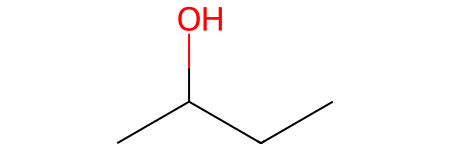

In [ ]:
mol2 = Chem.MolFromSmiles("CC(O)CC") #Рисуем с смайлс
mol2

In [ ]:
pat = Chem.MolFromSmiles("C=O") #Делаем кусочек для поиска
print(mol.HasSubstructMatch(pat)) #Наличие связи
print(mol.GetSubstructMatch(pat)) #Найдем один кусок, покажет атомы связывания
print(mol.GetSubstructMatches(pat)) #Показывает все куски в молекуле

True
(0, 9)
((0, 9), (5, 10))


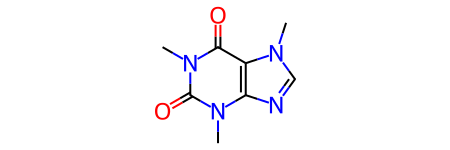

In [ ]:
suppl = Chem.SDMolSupplier("caffeine.sdf") # Можно прочесть сразу несколько молекул
m = suppl[0]
m

In [ ]:
list(m.GetPropNames()) #получаем имена всех свойств
m.GetProp("SMILES")

'Cn1cnc2n(C)c(=O)n(C)c(=O)c12'

SMARTS - ещё один вид записи для менее четких требований, например: есть ли в молекуле кольцо и т.д. и т.п.

In [ ]:
pat = Chem.MolFromSmarts("[r5]") #Ищем атом входящий в кольцо 5
print(mol.HasSubstructMatch(pat)) #Наличие атома в кольце 5
print(mol.GetSubstructMatch(pat)) #Найдем один атом
print(mol.GetSubstructMatches(pat)) #Показывает все атомы в цикле

True
(2,)
((2,), (3,), (6,), (7,), (8,))


Из структуры можно получить дескриптор, только в одну сторону. (Допустим бруто формула, молекулярная масса)

In [ ]:
mw = Descriptors.MolWt(mol) #Молекулярная масса
print(mw)

194.194


In [ ]:
df = pd.read_csv("chembl_drugs.txt.gz", sep="\t")
df.head(2)

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,PRODRUG,ORAL,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES
0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,1984.0,...,Y,N,N,Y,N,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...
1,112655,CHEMBL1009,"Levodopa (BAN, FDA, INN, JAN, USAN, USP)",4,NaN,Shire Development Inc; Orion Pharma; Merck Sha...,-dopa,dopamine receptor agonists,-dopa,1969.0,...,N,Y,N,N,N,Prescription-only,NaN,NaN,NaN,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11442 entries, 0 to 11441
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PARENT_MOLREGNO       11442 non-null  int64  
 1   CHEMBL_ID             11442 non-null  object 
 2   SYNONYMS              11440 non-null  object 
 3   DEVELOPMENT_PHASE     11442 non-null  int64  
 4   RESEARCH_CODES        5247 non-null   object 
 5   APPLICANTS            5160 non-null   object 
 6   USAN_STEM             5628 non-null   object 
 7   USAN_STEM_DEFINITION  5627 non-null   object 
 8   USAN_STEM_SUBSTEM     5628 non-null   object 
 9   USAN_YEAR             4938 non-null   float64
 10  FIRST_APPROVAL        1909 non-null   float64
 11  ATC_CODE              3051 non-null   object 
 12  ATC_CODE_DESCRIPTION  3051 non-null   object 
 13  INDICATION_CLASS      3903 non-null   object 
 14  SC_PATENT_NO          704 non-null    object 
 15  DRUG_TYPE          

In [ ]:
df = df[df['CANONICAL_SMILES'].notnull()]

In [ ]:
df = df[df["RULE_OF_FIVE"] == "Y"]

In [ ]:
df = df[df["DEVELOPMENT_PHASE"] == 4]
len(df)

1284

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="CANONICAL_SMILES")
df = df[~df["ROMol"].isnull()]
df.head(3)

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,ORAL,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol
0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,1984.0,...,N,N,Y,N,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6660>
1,112655,CHEMBL1009,"Levodopa (BAN, FDA, INN, JAN, USAN, USP)",4,NaN,Shire Development Inc; Orion Pharma; Merck Sha...,-dopa,dopamine receptor agonists,-dopa,1969.0,...,Y,N,N,N,Prescription-only,NaN,NaN,NaN,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6d60>
3,435293,CHEMBL270190,"Alvimopan (BAN, FDA, INN, USAN)",4,ADL 8-2698,Cubist Pharmaceuticals Inc,NaN,NaN,NaN,2002.0,...,Y,N,N,Y,Prescription-only,NaN,NaN,NaN,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6580>


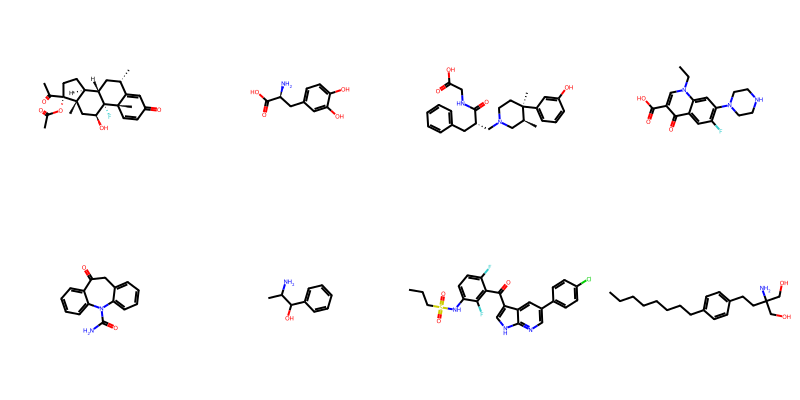

In [ ]:
PandasTools.FrameToGridImage(df.head(8), molsPerRow=4)

In [ ]:
df["MW"] = df.ROMol.map(Descriptors.MolWt)
df.head()

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol,MW
0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,1984.0,...,N,Y,N,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6660>,418.505
1,112655,CHEMBL1009,"Levodopa (BAN, FDA, INN, JAN, USAN, USP)",4,NaN,Shire Development Inc; Orion Pharma; Merck Sha...,-dopa,dopamine receptor agonists,-dopa,1969.0,...,N,N,N,Prescription-only,NaN,NaN,NaN,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6d60>,197.190
3,435293,CHEMBL270190,"Alvimopan (BAN, FDA, INN, USAN)",4,ADL 8-2698,Cubist Pharmaceuticals Inc,NaN,NaN,NaN,2002.0,...,N,N,Y,Prescription-only,NaN,NaN,NaN,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6580>,424.541
4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,...,N,Y,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6ac0>,319.336
5,139014,CHEMBL1068,"Oxcarbazepine (BAN, FDA, INN, USAN)",4,GP-47680; KIN-493,Supernus Pharmaceuticals Inc; Novartis Pharmac...,-pin(e),tricyclic compounds,-pin(e),2002.0,...,N,N,Y,Prescription-only,NaN,NaN,NaN,NC(=O)N1c2ccccc2CC(=O)c3ccccc13,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff64a0>,252.273


In [ ]:
df2 = df[df['USAN_STEM'] == "-oxacin"].copy()
df2.head()

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol,MW
4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,...,N,Y,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6ac0>,319.336
72,15371,CHEMBL277100,"Temafloxacin (BAN, INN); Temafloxacin HCl (USAN)",4,ABBOTT-62254,Abbott,-oxacin,antibacterials (quinolone derivatives),-oxacin,1988.0,...,N,N,N,Withdrawn,1992.0,United States; United Kingdom; Germany,"Low blood sugar; hemolytic anemia; kidney, liv...",CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3cc2F)c4ccc...,<rdkit.Chem.rdchem.Mol object at 0x7f34360c63c0>,417.387
98,241,CHEMBL8,"Ciprofloxacin (BAN, FDA, INN, USAN, USP); Cipr...",4,BAY-Q-3939; BAY-O-9867 Monohydrate; BAY-O-9867,Depomed Inc; Bayer Pharmaceuticals Corp; Bayer...,-oxacin,antibacterials (quinolone derivatives),-oxacin,1987.0,...,Y,Y,Y,Prescription-only,NaN,NaN,NaN,OC(=O)C1=CN(C2CC2)c3cc(N4CCNCC4)c(F)cc3C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f34360c6820>,331.347
365,17136,CHEMBL583,"Grepafloxacin (INN); Grepafloxacin HCl (BAN, F...",4,OPC-17116,Otsuka Pharmaceutical Co Ltd,-oxacin,antibacterials (quinolone derivatives),-oxacin,1995.0,...,N,N,N,Withdrawn,1999.0,United States; United Kingdom; United States; ...,Cardiac repolarization; QTc interval prolongation,CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3c(C)c2F)C4CC4,<rdkit.Chem.rdchem.Mol object at 0x7f3436008a50>,359.401
370,1853,CHEMBL430,Gemifloxacin (INN); Gemifloxacin Mesylate (FDA...,4,LB-20304a; SB-265805-S,Cornerstone Therapeutics Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1998.0,...,N,N,Y,Prescription-only,NaN,NaN,NaN,CO\N=C\1/CN(CC1CN)c2nc3N(C=C(C(=O)O)C(=O)c3cc2...,<rdkit.Chem.rdchem.Mol object at 0x7f3436008c10>,389.387


In [ ]:
df2['name'] = df2['SYNONYMS'].apply(lambda x: x.split()[0]) # Сделали имена лекарствам
df2.head()

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol,MW,name
4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,...,Y,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6ac0>,319.336,Norfloxacin
72,15371,CHEMBL277100,"Temafloxacin (BAN, INN); Temafloxacin HCl (USAN)",4,ABBOTT-62254,Abbott,-oxacin,antibacterials (quinolone derivatives),-oxacin,1988.0,...,N,N,Withdrawn,1992.0,United States; United Kingdom; Germany,"Low blood sugar; hemolytic anemia; kidney, liv...",CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3cc2F)c4ccc...,<rdkit.Chem.rdchem.Mol object at 0x7f34360c63c0>,417.387,Temafloxacin
98,241,CHEMBL8,"Ciprofloxacin (BAN, FDA, INN, USAN, USP); Cipr...",4,BAY-Q-3939; BAY-O-9867 Monohydrate; BAY-O-9867,Depomed Inc; Bayer Pharmaceuticals Corp; Bayer...,-oxacin,antibacterials (quinolone derivatives),-oxacin,1987.0,...,Y,Y,Prescription-only,NaN,NaN,NaN,OC(=O)C1=CN(C2CC2)c3cc(N4CCNCC4)c(F)cc3C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f34360c6820>,331.347,Ciprofloxacin
365,17136,CHEMBL583,"Grepafloxacin (INN); Grepafloxacin HCl (BAN, F...",4,OPC-17116,Otsuka Pharmaceutical Co Ltd,-oxacin,antibacterials (quinolone derivatives),-oxacin,1995.0,...,N,N,Withdrawn,1999.0,United States; United Kingdom; United States; ...,Cardiac repolarization; QTc interval prolongation,CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3c(C)c2F)C4CC4,<rdkit.Chem.rdchem.Mol object at 0x7f3436008a50>,359.401,Grepafloxacin
370,1853,CHEMBL430,Gemifloxacin (INN); Gemifloxacin Mesylate (FDA...,4,LB-20304a; SB-265805-S,Cornerstone Therapeutics Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1998.0,...,N,Y,Prescription-only,NaN,NaN,NaN,CO\N=C\1/CN(CC1CN)c2nc3N(C=C(C(=O)O)C(=O)c3cc2...,<rdkit.Chem.rdchem.Mol object at 0x7f3436008c10>,389.387,Gemifloxacin


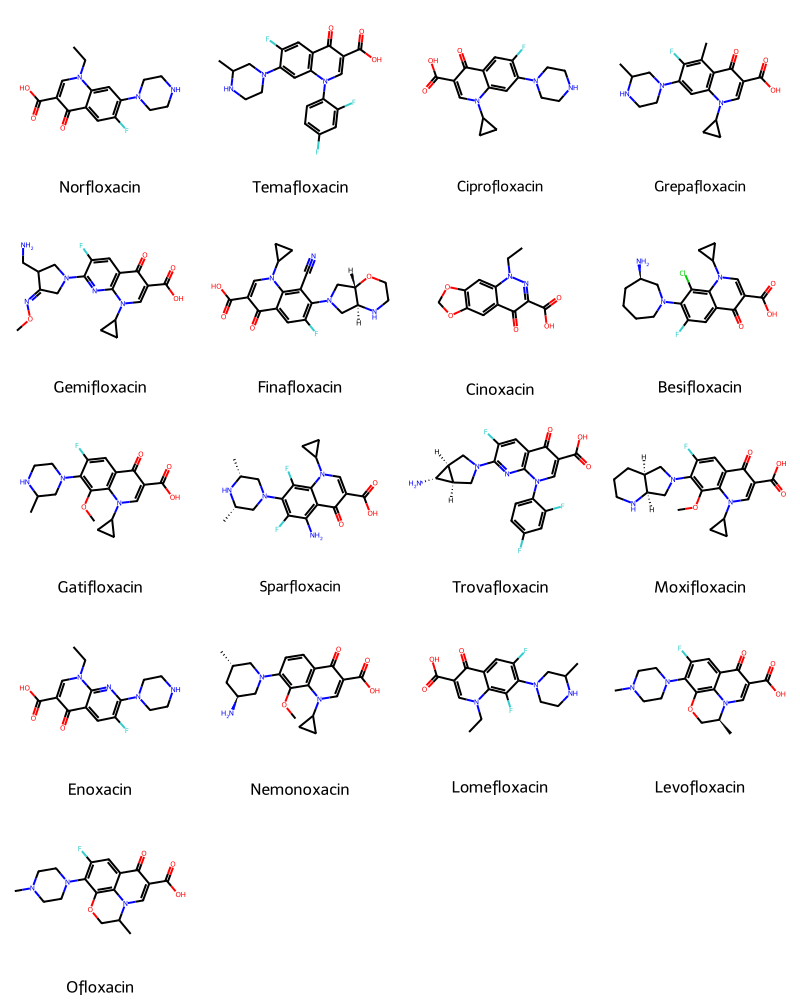

In [ ]:
PandasTools.FrameToGridImage(df2, molsPerRow=4, legendsCol='name')

Фингерпринты - описываем молекулы с помощью кусочков

Morgan - вариант в котором у нас небольшие кусочки по 0-3 связей

In [ ]:
def get_fp(molecule):
  bi = {}
  return AllChem.GetMorganFingerprintAsBitVect(molecule, 3, nBits = 2048, bitInfo=bi)

In [ ]:
df2['Finger_print'] = df2.ROMol.map(get_fp)
df2.head()

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol,MW,name,Finger_print
4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,...,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3,<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6ac0>,319.336,Norfloxacin,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
72,15371,CHEMBL277100,"Temafloxacin (BAN, INN); Temafloxacin HCl (USAN)",4,ABBOTT-62254,Abbott,-oxacin,antibacterials (quinolone derivatives),-oxacin,1988.0,...,N,Withdrawn,1992.0,United States; United Kingdom; Germany,"Low blood sugar; hemolytic anemia; kidney, liv...",CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3cc2F)c4ccc...,<rdkit.Chem.rdchem.Mol object at 0x7f34360c63c0>,417.387,Temafloxacin,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
98,241,CHEMBL8,"Ciprofloxacin (BAN, FDA, INN, USAN, USP); Cipr...",4,BAY-Q-3939; BAY-O-9867 Monohydrate; BAY-O-9867,Depomed Inc; Bayer Pharmaceuticals Corp; Bayer...,-oxacin,antibacterials (quinolone derivatives),-oxacin,1987.0,...,Y,Prescription-only,NaN,NaN,NaN,OC(=O)C1=CN(C2CC2)c3cc(N4CCNCC4)c(F)cc3C1=O,<rdkit.Chem.rdchem.Mol object at 0x7f34360c6820>,331.347,Ciprofloxacin,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
365,17136,CHEMBL583,"Grepafloxacin (INN); Grepafloxacin HCl (BAN, F...",4,OPC-17116,Otsuka Pharmaceutical Co Ltd,-oxacin,antibacterials (quinolone derivatives),-oxacin,1995.0,...,N,Withdrawn,1999.0,United States; United Kingdom; United States; ...,Cardiac repolarization; QTc interval prolongation,CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3c(C)c2F)C4CC4,<rdkit.Chem.rdchem.Mol object at 0x7f3436008a50>,359.401,Grepafloxacin,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
370,1853,CHEMBL430,Gemifloxacin (INN); Gemifloxacin Mesylate (FDA...,4,LB-20304a; SB-265805-S,Cornerstone Therapeutics Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1998.0,...,Y,Prescription-only,NaN,NaN,NaN,CO\N=C\1/CN(CC1CN)c2nc3N(C=C(C(=O)O)C(=O)c3cc2...,<rdkit.Chem.rdchem.Mol object at 0x7f3436008c10>,389.387,Gemifloxacin,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(df2.loc[4,'Finger_print'], fp_arr)
print(np.nonzero(fp_arr))

(array([   1,   19,   34,   38,   45,   61,   80,  154,  164,  231,  294,
        305,  314,  319,  389,  407,  453,  456,  464,  525,  565,  571,
        650,  699,  713,  804,  807,  875,  880,  926,  930,  935,  974,
       1047, 1057, 1114, 1237, 1295, 1308, 1327, 1328, 1332, 1357, 1380,
       1453, 1455, 1480, 1516, 1575, 1691, 1699, 1729, 1840, 1873, 1917,
       1928, 1991, 2020, 2024, 2036]),)


[(<rdkit.Chem.rdchem.Mol object at 0x7f3435ff6ac0>, 1, {1: ((15, 3),), 19: ((19, 3),), 34: ((1, 1),), 38: ((14, 3),), 45: ((16, 1),), 61: ((3, 2),), 80: ((1, 0),), 154: ((18, 3),), 164: ((12, 2),), 231: ((17, 2),), 294: ((0, 1),), 305: ((19, 1), (21, 1)), 314: ((9, 1),), 319: ((4, 3),), 389: ((7, 1),), 407: ((17, 1),), 453: ((4, 2),), 456: ((5, 1),), 464: ((3, 1),), 525: ((8, 1),), 565: ((16, 3),), 571: ((2, 3),), 650: ((6, 0), (9, 0)), 699: ((13, 1),), 713: ((10, 2),), 804: ((18, 2), (22, 2)), 807: ((5, 0), (7, 0)), 875: ((11, 1), (15, 1)), 880: ((14, 2),), 926: ((18, 0), (19, 0), (21, 0), (22, 0)), 930: ((10, 3),), 935: ((2, 0), (17, 0)), 974: ((15, 2),), 1047: ((5, 2),), 1057: ((0, 0),), 1114: ((20, 0),), 1237: ((2, 2),), 1295: ((14, 1),), 1308: ((20, 1),), 1327: ((17, 3),), 1328: ((12, 3),), 1332: ((11, 2),), 1357: ((10, 1),), 1380: ((4, 0), (8, 0), (10, 0), (12, 0), (14, 0), (16, 0)), 1453: ((1, 2),), 1455: ((2, 1),), 1480: ((18, 1), (22, 1)), 1516: ((20, 2),), 1575: ((16, 2),), 1

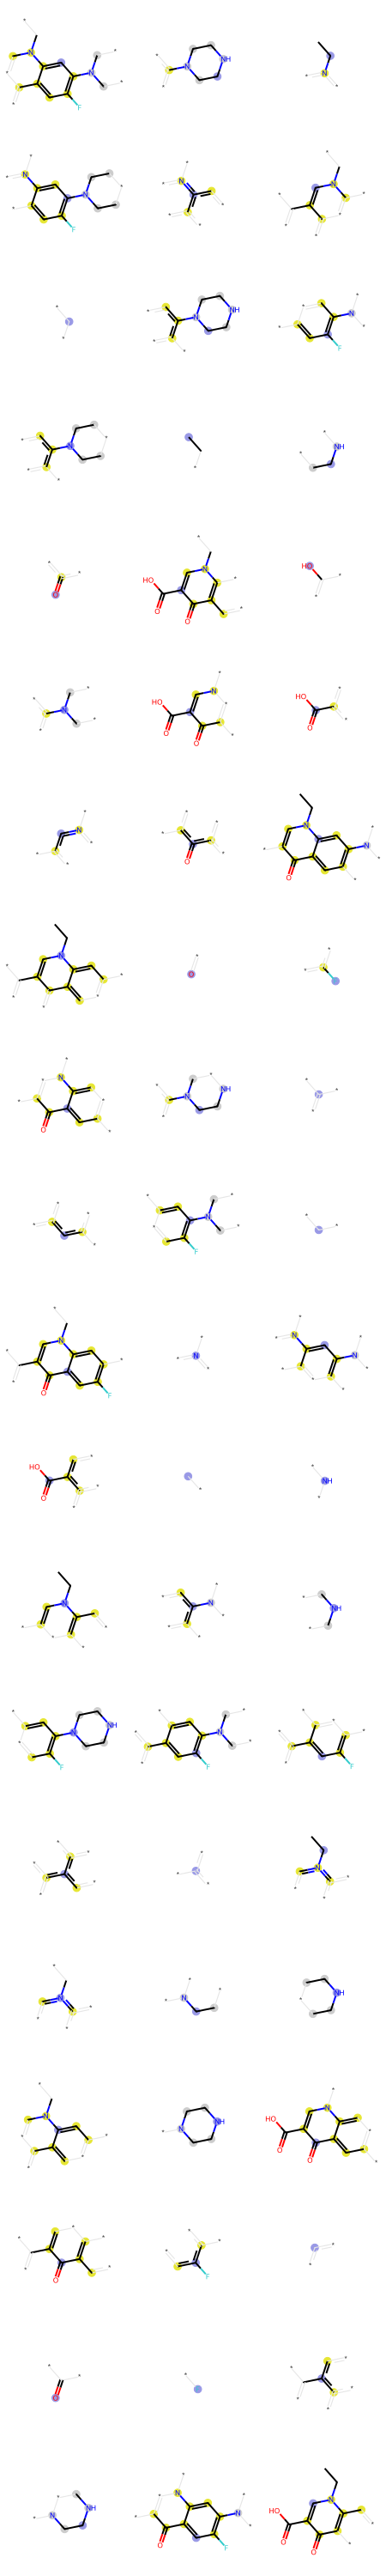

In [ ]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(df.loc[4,'ROMol'], 3, nBits = 2048, bitInfo=bi)
prints = [(df2.loc[4,'ROMol'], x, bi) for x in df2.loc[4, 'Finger_print'].GetOnBits()]
print(prints)
Draw.DrawMorganBits(prints, molsPerRow = 3)